In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE


Membaca File Excel

In [11]:
!pip install openpyxl
df = pd.read_excel("/content/weather_data.xlsx")
df.head()



,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           10 non-null     int64  
 1   Humidity              10 non-null     int64  
 2   Wind Speed            10 non-null     float64
 3   Precipitation (%)     10 non-null     int64  
 4   Cloud Cover           10 non-null     object 
 5   Atmospheric Pressure  10 non-null     float64
 6   UV Index              10 non-null     int64  
 7   Season                10 non-null     object 
 8   Visibility (km)       10 non-null     float64
 9   Location              10 non-null     object 
 10  Weather Type          10 non-null     object 
dtypes: float64(3), int64(4), object(4)
memory usage: 1012.0+ bytes


In [13]:
for col in ['Cloud Cover', 'Season', 'Location', 'Weather Type']:
    print(col, ":", df[col].unique())


Cloud Cover : ['partly cloudy' 'clear' 'overcast']
Season : ['Winter' 'Spring' 'Summer']
Location : ['inland' 'mountain' 'coastal']
Weather Type : ['Rainy' 'Cloudy' 'Sunny' 'Snowy']


In [14]:
encoder = LabelEncoder()

for col in ['Cloud Cover', 'Season', 'Location', 'Weather Type']:
    df[col] = encoder.fit_transform(df[col])


In [15]:
df.isnull().sum()


,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


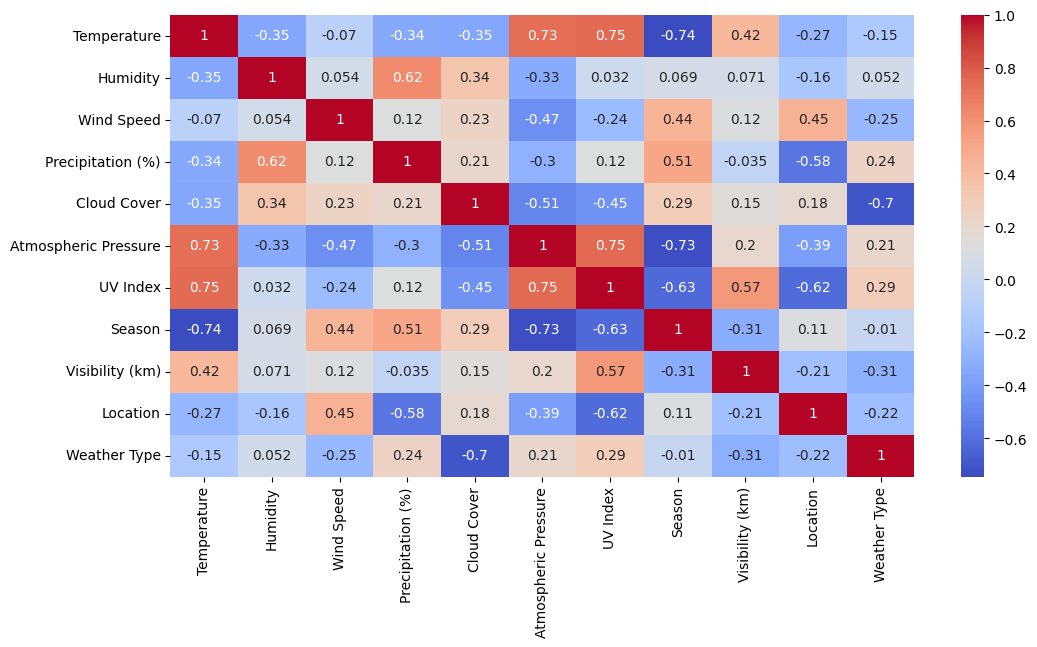

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


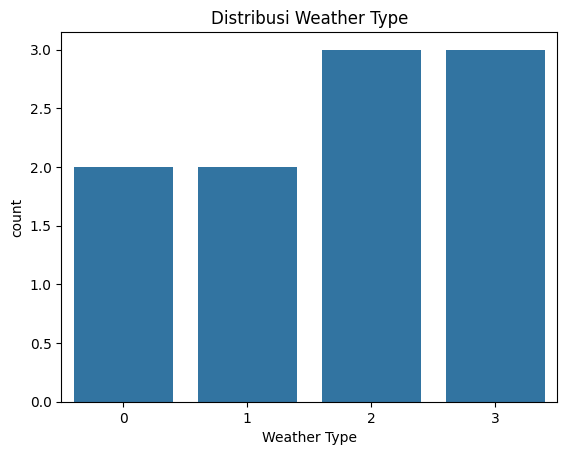

In [17]:
sns.countplot(x=df['Weather Type'])
plt.title("Distribusi Weather Type")
plt.show()


In [18]:
X = df.drop('Weather Type', axis=1)
y = df['Weather Type']



In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
sm = SMOTE(random_state=42, k_neighbors=1, sampling_strategy='not minority')
X_train_bal, y_train_bal = sm.fit_resample(X_train_scaled, y_train)


In [43]:
model_knn = KNeighborsClassifier(
    n_neighbors=3,
    metric='euclidean',
    weights='distance'
)

model_knn.fit(X_train_bal, y_train_bal)


KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [44]:
y_pred = model_knn.predict(X_test_scaled)


In [45]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.33      0.33      0.33         2
weighted avg       0.50      0.50      0.50         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

Confusion Matrix:
 [[0 0 1]
 [0 1 0]
 [0 0 0]]


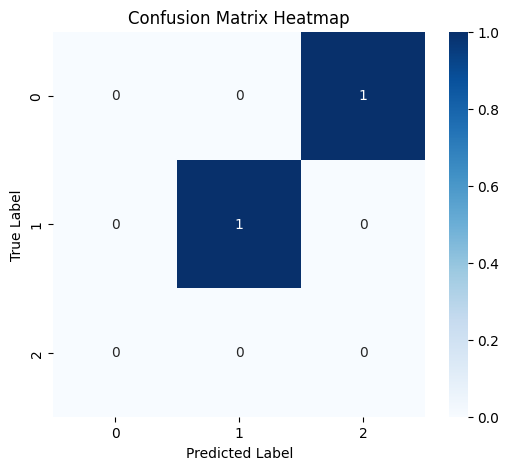

In [46]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()




In [51]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_knn, X_train_bal, y_train_bal, cv=3)
print("Rata-rata Akurasi CV:", cv_scores.mean())
print("Standar Deviasi:", cv_scores.std())


Rata-rata Akurasi CV: 0.6388888888888888
Standar Deviasi: 0.30681558381075724


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [49]:
max_k = len(X_train_bal)


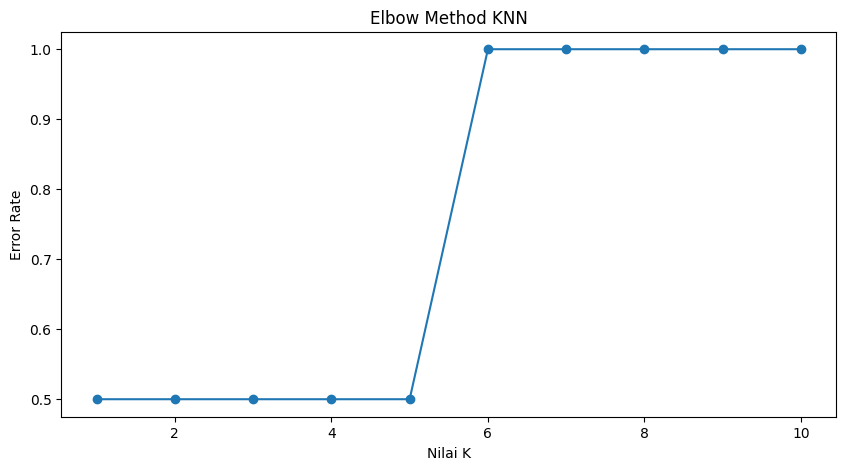

In [50]:
error_rates = []

for k in range(1, max_k + 1):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_bal, y_train_bal)

    pred_k = knn_temp.predict(X_test_scaled)
    error_rates.append(np.mean(pred_k != y_test))

plt.figure(figsize=(10,5))
plt.plot(range(1, max_k + 1), error_rates, marker='o')
plt.title("Elbow Method KNN")
plt.xlabel("Nilai K")
plt.ylabel("Error Rate")
plt.show()
